In [1]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/dry-beans-classification-iti-ai-pro-intake02/sample_submission.csv
/kaggle/input/dry-beans-classification-iti-ai-pro-intake02/train.csv
/kaggle/input/dry-beans-classification-iti-ai-pro-intake02/test.csv


In [2]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import VotingClassifier, StackingClassifier
from mlxtend.classifier import StackingCVClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import r2_score, classification_report, confusion_matrix, roc_curve, auc, plot_confusion_matrix
from sklearn.metrics import accuracy_score, f1_score
from sklearn.feature_selection import mutual_info_classif
from tqdm import tqdm
from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, StandardScaler, LabelEncoder , RobustScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import KFold, StratifiedKFold, cross_val_score, GridSearchCV
from scipy import stats
from scipy.stats import skew
from sklearn.multiclass import OneVsRestClassifier
from sklearn.multiclass import OneVsOneClassifier
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import os
import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns
import itertools
%matplotlib inline
import plotly
import plotly.express as px
import plotly.graph_objs as go
import math
plt.style.use("seaborn-whitegrid")
import warnings
warnings.filterwarnings("ignore")

# Load data

In [3]:
df = pd.read_csv('/kaggle/input/dry-beans-classification-iti-ai-pro-intake02/train.csv')


In [4]:
df.y = df.y.astype('category')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10834 entries, 0 to 10833
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   ID               10834 non-null  int64   
 1   Area             10834 non-null  int64   
 2   Perimeter        10834 non-null  float64 
 3   MajorAxisLength  10834 non-null  float64 
 4   MinorAxisLength  10834 non-null  float64 
 5   AspectRation     10834 non-null  float64 
 6   Eccentricity     10834 non-null  float64 
 7   ConvexArea       10834 non-null  int64   
 8   EquivDiameter    10834 non-null  float64 
 9   Extent           10834 non-null  float64 
 10  Solidity         10834 non-null  float64 
 11  roundness        10834 non-null  float64 
 12  Compactness      10834 non-null  float64 
 13  ShapeFactor1     10834 non-null  float64 
 14  ShapeFactor2     10834 non-null  float64 
 15  ShapeFactor3     10834 non-null  float64 
 16  ShapeFactor4     10834 non-null  float64

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,10834.0,5416.500000,3127.650742,0.000000,2708.250000,5416.500000,8124.750000,10833.000000
Area,10834.0,53095.675189,29542.542580,20420.000000,36343.500000,44645.000000,61295.000000,254616.000000
Perimeter,10834.0,855.274892,214.991122,524.932000,703.601250,793.739500,975.517500,1985.370000
MajorAxisLength,10834.0,320.036169,85.961630,183.601165,253.501071,296.377365,376.068399,738.860153
MinorAxisLength,10834.0,202.410342,45.113965,129.576207,175.927024,192.525040,217.315195,450.926187
AspectRation,10834.0,1.581294,0.244314,1.024868,1.432985,1.550761,1.703029,2.388873
Eccentricity,10834.0,0.750588,0.091481,0.218951,0.716250,0.764314,0.809450,0.908167
ConvexArea,10834.0,53816.205926,29999.710739,20684.000000,36731.250000,45148.000000,62251.500000,263261.000000
EquivDiameter,10834.0,253.123583,59.433080,161.243764,215.113880,238.419335,279.362162,569.374358
Extent,10834.0,0.749937,0.048949,0.555315,0.718778,0.760141,0.786871,0.866195


In [6]:
df['y'].value_counts()

DERMASON    2837
SIRA        2109
SEKER       1621
HOROZ       1488
CALI        1304
BARBUNYA    1057
BOMBAY       418
Name: y, dtype: int64

## Data visualization

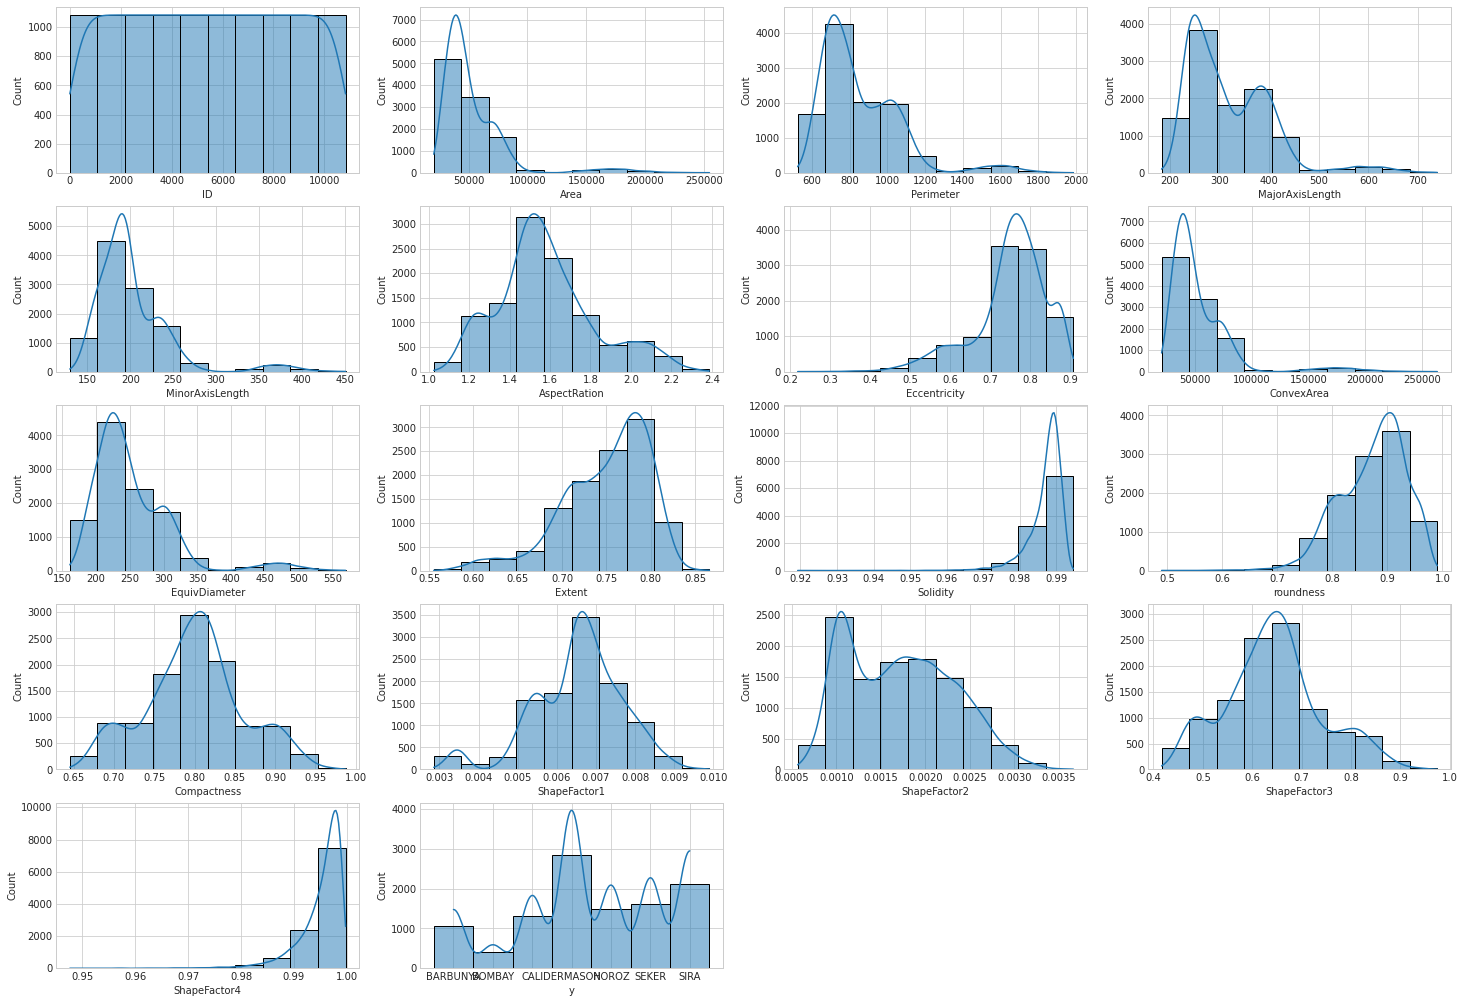

In [7]:
plt.figure(figsize=(25, 25))
for i, col in enumerate(list(df.columns)):
    plt.subplot(7, 4, i+1)
    sns.histplot(df[col], kde=True, bins=10)

<AxesSubplot:>

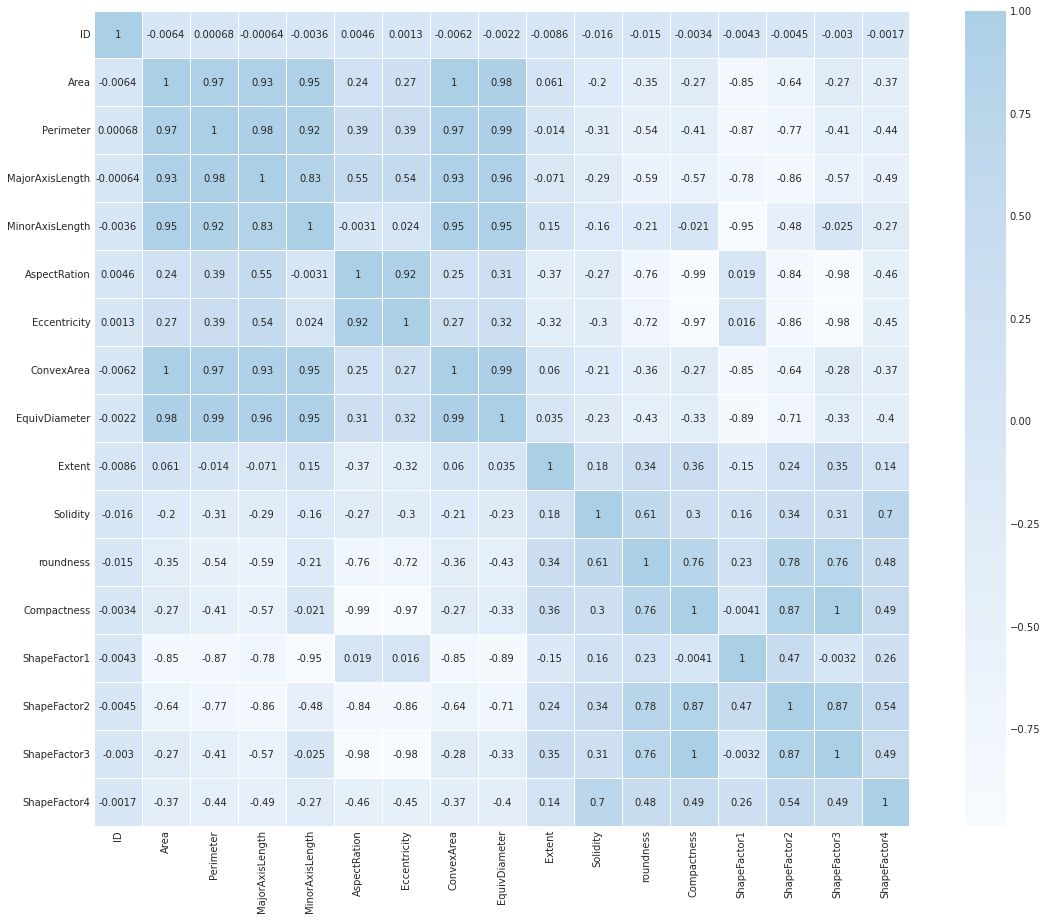

In [8]:
corr = df.corr()
f,axes = plt.subplots(1,1,figsize = (20,15))
sns.heatmap(corr, square=True, annot = True, linewidth = .5, center = 2, ax = axes, cmap='Blues')

In [9]:
data = df.copy()
data.head(10)

,ID,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,y
0,0,58238,971.303,397.202654,186.945510,2.124697,0.882317,58977,272.306674,0.604756,0.987470,0.775723,0.685561,0.006820,0.000929,0.469994,0.998595,HOROZ
1,1,44515,757.601,265.590470,213.967453,1.241266,0.592420,44780,238.071960,0.771745,0.994082,0.974620,0.896387,0.005966,0.002376,0.803510,0.997370,SEKER
2,2,31662,653.783,239.902428,168.421505,1.424417,0.712136,32034,200.781748,0.801407,0.988387,0.930853,0.836931,0.007577,0.002293,0.700453,0.997737,DERMASON
3,3,38778,734.020,268.446281,184.061923,1.458456,0.727925,39208,222.201897,0.766137,0.989033,0.904439,0.827733,0.006923,0.002005,0.685142,0.999250,DERMASON
4,4,42530,775.403,281.212824,193.236878,1.455275,0.726511,43028,232.703412,0.729816,0.988426,0.888895,0.827499,0.006612,0.001912,0.684755,0.996507,SIRA
5,5,34771,683.109,230.586519,192.185558,1.199812,0.552574,35163,210.408679,0.783978,0.988852,0.936369,0.912493,0.006632,0.002836,0.832644,0.999016,SEKER
6,6,45817,862.123,333.458920,175.910473,1.895617,0.849535,46654,241.528500,0.757932,0.982059,0.774637,0.724313,0.007278,0.001236,0.524629,0.994495,HOROZ
7,7,38449,746.242,284.788951,172.925734,1.646886,0.794544,38944,221.257287,0.804878,0.987289,0.867632,0.776917,0.007407,0.001665,0.603600,0.994060,SIRA
8,8,38396,709.443,250.380456,195.738890,1.279155,0.623572,38723,221.104739,0.748431,0.991555,0.958652,0.883075,0.006521,0.002446,0.779822,0.997513,SEKER
9,9,44492,785.831,297.953914,190.455857,1.564425,0.769030,44870,238.010449,0.772431,0.991576,0.905385,0.798816,0.006697,0.001682,0.638108,0.998271,SIRA


## Data Preparation

In [10]:
y_labels = ['DERMASON', 'SIRA', 'SEKER', 'HOROZ', 'CALI', 'BARBUNYA', 'BOMBAY']

In [11]:
def normalize_data(df,column):
    return RobustScaler().fit_transform(np.array(df[column]).reshape(-1,1))


In [12]:
def transformation(df,columns,func):
    for col in columns:
        df[col]=func(df[col])
    return df

In [13]:
def encodingTarget(df, cols):
    for col_name in cols:
        df[col_name] = df[col_name].replace({'DERMASON' :0, 'SIRA':1, 'SEKER':2, 'HOROZ':3, 'CALI':4, 'BARBUNYA':5, 'BOMBAY':6})
    return df

In [14]:
def decodingTarget(df, cols):
    for col_name in cols:
        df[col_name] = df[col_name].replace({0:'DERMASON' ,1: 'SIRA', 2:'SEKER', 3:'HOROZ', 4:'CALI',5: 'BARBUNYA', 6:'BOMBAY'})
    return df

In [15]:
data = df.copy()

def prepare_data(df, isTest=False):
    
    outliersColomns = ['Area', 'Perimeter', 'MajorAxisLength', 'MinorAxisLength',
                       'AspectRation', 'Eccentricity', 'ConvexArea', 'EquivDiameter', 'Extent',
                       'Solidity', 'roundness', 'Compactness', 'ShapeFactor1', 'ShapeFactor2',
                       'ShapeFactor3', 'ShapeFactor4']
    if isTest == False:
        before_ = len(df)
        print('Removed ',before_ - len(df),' outliers')

        
  
    df['ShapeFactor5'] = df['MajorAxisLength'] / df['Perimeter']

    
    NonScaledFeatures=['ID', 'y','Index']
    for col_name in df.columns:
        if col_name not in NonScaledFeatures:
            scaled_col = col_name + '_real'
            df[col_name] = df[col_name].fillna(df[col_name].mean())  
            df[scaled_col]= df[col_name]
            df[col_name]=normalize_data(df,col_name)
  
            
    return df

In [16]:
#prepare data
data = prepare_data(data)
labelencoder = LabelEncoder()
data['y'] = labelencoder.fit_transform(data['y'])

Removed  0  outliers


## Train Test Split

In [17]:
train_df, val_df = train_test_split(data, test_size=0.15, random_state=42, shuffle=True, stratify=data.y) 

x_train = train_df.drop(columns=['ID','y'])
y_train = train_df['y']

x_val = val_df.drop(columns=['ID','y'])
y_val = val_df['y']

In [18]:
x_train = data.drop(columns=['ID','y'])
y_train = data['y']

In [19]:

model_columns = [
                  'Area', 'Perimeter', 'MajorAxisLength', 'MinorAxisLength', 
                  'AspectRation', 'Eccentricity', 'roundness', 'Extent',  'ShapeFactor5',
                  'Solidity','ShapeFactor1', 'ShapeFactor2', 'ShapeFactor3', 'ShapeFactor4',
                  
                  ]

#Models


In [20]:
xgb_model = XGBClassifier(learning_rate=0.07, random_state =42, objective='multi:softmax', max_depth=5, reg_alpha = 0.002, gamma=0.01, verbosity=0) 
 
xgb_model.fit(x_train[model_columns], y_train)
predictions_XGB = xgb_model.predict(x_val[model_columns])
print('Mean_F1_score', f1_score(y_val, predictions_XGB, average='micro'))
print("Classification Report: \n", classification_report(y_val, predictions_XGB))

Mean_F1_score 0.959409594095941
Classification Report: 
               precision    recall  f1-score   support

           0       0.99      0.96      0.98       159
           1       1.00      1.00      1.00        63
           2       0.97      0.99      0.98       196
           3       0.94      0.96      0.95       426
           4       0.99      0.96      0.97       223
           5       0.99      0.98      0.99       243
           6       0.92      0.92      0.92       316

    accuracy                           0.96      1626
   macro avg       0.97      0.97      0.97      1626
weighted avg       0.96      0.96      0.96      1626



In [21]:
lgb_model = LGBMClassifier(objective='multiclass', random_state=42, learning_rate=0.03, reg_alpha=0.0001)
lgb_model.fit(x_train[model_columns], y_train)
predictions_LGB = lgb_model.predict(x_val[model_columns])

print('Mean_F1_score', f1_score(y_val, predictions_LGB, average='micro'))
print("Classification Report: \n", classification_report(y_val, predictions_LGB))

Mean_F1_score 0.974169741697417
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      0.97      0.99       159
           1       1.00      1.00      1.00        63
           2       0.98      0.99      0.99       196
           3       0.96      0.97      0.97       426
           4       0.99      0.98      0.98       223
           5       1.00      0.98      0.99       243
           6       0.95      0.95      0.95       316

    accuracy                           0.97      1626
   macro avg       0.98      0.98      0.98      1626
weighted avg       0.97      0.97      0.97      1626



In [22]:
mlp_model = MLPClassifier(solver='adam', activation='logistic', alpha=1e-4, random_state=42, max_iter=1000, early_stopping=True, validation_fraction=0.2, warm_start=True, verbose=False, learning_rate ='adaptive', learning_rate_init=0.01)
mlp_model = mlp_model.fit(x_train[model_columns], y_train)

predictions_MLP = mlp_model.predict(x_val[model_columns])
print('Mean_F1_score', f1_score(y_val, predictions_MLP, average='micro'))
print("Classification Report")
print(classification_report(y_val, predictions_MLP))

Mean_F1_score 0.9274292742927429
Classification Report
              precision    recall  f1-score   support

           0       0.97      0.87      0.92       159
           1       1.00      1.00      1.00        63
           2       0.91      0.97      0.94       196
           3       0.92      0.92      0.92       426
           4       0.96      0.95      0.95       223
           5       0.96      0.96      0.96       243
           6       0.86      0.89      0.88       316

    accuracy                           0.93      1626
   macro avg       0.94      0.94      0.94      1626
weighted avg       0.93      0.93      0.93      1626



In [23]:
kn_model = KNeighborsClassifier(algorithm='auto', weights ='distance', n_neighbors=15)#=10
kn_model.fit(x_train[model_columns], y_train)
          
predictions_KN = kn_model.predict(x_val[model_columns])
print('Mean_F1_score', f1_score(y_val, predictions_KN, average='micro'))
print("Classification Report: \n", classification_report(y_val, predictions_KN))

Mean_F1_score 1.0
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       159
           1       1.00      1.00      1.00        63
           2       1.00      1.00      1.00       196
           3       1.00      1.00      1.00       426
           4       1.00      1.00      1.00       223
           5       1.00      1.00      1.00       243
           6       1.00      1.00      1.00       316

    accuracy                           1.00      1626
   macro avg       1.00      1.00      1.00      1626
weighted avg       1.00      1.00      1.00      1626



In [24]:
svc_model = SVC(C=1.0, kernel='rbf', max_iter=-1, random_state=42, decision_function_shape='ovo', gamma=0.20)
svc_model.fit(x_train[model_columns], y_train)

predictions_SVC = svc_model.predict(x_val[model_columns])
print('Mean_F1_score', f1_score(y_val, predictions_SVC, average='micro'))
print("Classification Report: \n", classification_report(y_val, predictions_SVC))

Mean_F1_score 0.942189421894219
Classification Report: 
               precision    recall  f1-score   support

           0       0.99      0.93      0.96       159
           1       1.00      1.00      1.00        63
           2       0.95      0.98      0.96       196
           3       0.92      0.94      0.93       426
           4       0.98      0.96      0.97       223
           5       0.97      0.95      0.96       243
           6       0.89      0.90      0.89       316

    accuracy                           0.94      1626
   macro avg       0.96      0.95      0.95      1626
weighted avg       0.94      0.94      0.94      1626



In [25]:
rf_model = RandomForestClassifier(n_estimators=1000, ccp_alpha=0.0001, criterion='entropy', max_depth=7, n_jobs=-1, random_state=42)
rf_model.fit(x_train[model_columns], y_train)

predictions_rf = rf_model.predict(x_val[model_columns])
print('Mean_F1_score', f1_score(y_val, predictions_rf, average='micro'))
print("Classification Report: \n", classification_report(y_val, predictions_rf))

Mean_F1_score 0.931119311193112
Classification Report: 
               precision    recall  f1-score   support

           0       0.97      0.87      0.92       159
           1       1.00      1.00      1.00        63
           2       0.91      0.97      0.94       196
           3       0.91      0.95      0.93       426
           4       0.99      0.94      0.96       223
           5       0.97      0.95      0.96       243
           6       0.88      0.88      0.88       316

    accuracy                           0.93      1626
   macro avg       0.95      0.94      0.94      1626
weighted avg       0.93      0.93      0.93      1626



In [26]:
LR_model = LogisticRegression()
ovr = OneVsOneClassifier(LR_model)
ovr.fit(x_train[model_columns], y_train)

predictions_LR = ovr.predict(x_val[model_columns])
print('Mean_F1_score', f1_score(y_val, predictions_LR, average='micro'))

print("Classification Report: \n", classification_report(y_val, predictions_LR))

Mean_F1_score 0.9249692496924969
Classification Report: 
               precision    recall  f1-score   support

           0       0.97      0.89      0.92       159
           1       1.00      1.00      1.00        63
           2       0.93      0.96      0.94       196
           3       0.91      0.92      0.92       426
           4       0.96      0.95      0.96       223
           5       0.95      0.95      0.95       243
           6       0.86      0.88      0.87       316

    accuracy                           0.92      1626
   macro avg       0.94      0.93      0.94      1626
weighted avg       0.93      0.92      0.93      1626



In [27]:
classifiers = [
                ('SVC:', svc_model),
                ('MLP:', mlp_model),
                ('LGB:', lgb_model),
                ('XGB:', xgb_model),
                ('LR:', ovr),
                ('KN:', kn_model)
                ]
    
for clf_name, clf in classifiers:
    y_pred = clf.predict(x_val[model_columns])
    print(clf_name, f1_score(y_val, y_pred, average='micro'))

vc = VotingClassifier(estimators=classifiers)
vc.fit(x_train[model_columns], y_train)
y_pred_voting = vc.predict(x_val[model_columns])

print('Voting Classifier: ',f1_score(y_val, y_pred_voting, average='micro'))

SVC: 0.942189421894219
MLP: 0.9274292742927429
LGB: 0.974169741697417
XGB: 0.959409594095941
LR: 0.9249692496924969
KN: 1.0
Voting Classifier:  0.9563345633456335


## Reading the test file

In [28]:
df_test = pd.read_csv('/kaggle/input/dry-beans-classification-iti-ai-pro-intake02/test.csv')


In [29]:
X_test = df_test.copy()
X_test = prepare_data(X_test, isTest=True)


X_test = X_test.drop(columns=['ID'])

y_test_predicted_vc = vc.predict(X_test[model_columns])
y_test_predicted_vc = labelencoder.inverse_transform(y_test_predicted_vc)
df_test['y'] = y_test_predicted_vc

In [30]:
df_test[['ID', 'y']].to_csv('/kaggle/working/submission.csv', index=False)